<a href="https://colab.research.google.com/github/hamiin47/OB-session/blob/main/Assign_0526.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **7.1 시계열 문제**
- 시계열 분석 : 시간에 따라 변하는 데이터를 사용하여 추이를 분석하는 것
  - 불규칙 변동 : 규칙성이 없어 예측 불가능하고 우연적으로 발생하는 변동

   ex. 전쟁, 홍수, 화재, 지진
  - 추세 변동 : 시계열 자료가 갖는 장기적인 변화 추세 → 장기간에 걸쳐 지속적으로 증가, 감소하거나 또는 일정한 상태를 유지하려는 성향을 의미하기 때문에 짧은 기간 동안에는 추세 변동을 찾기 어려운 단점이 있다.

   ex. 국내총생산, 인구중가율
  - 순환 변동 : 대체로 2~3년 정도의 일정한 기간을 주기로 순환적으로 나타나는 변동

   ex. 경기 변동
  - 계절 변동 : 시계열 자료에서 보통 계절적 영향과 사회적 관습에 따라 1년 주기로 변동

- 시계열 데이터 : 규칙적 시계열 / 불규칙적 시계열
  - 규칙적 시계열 : 트렌드와 분산이 불변하는 데이터
  - 불규칙적 시계열 : 트렌드 혹은 분산이 변화하는 시계열 데이터

   → 불규칙적 시계열 데이터에 규칙성을 부여하는 방법으로는 AR, MA, ARMA, ARIMA 모델을 적용하는 것이 있다.

# **7.2 AR, MA, ARMA, ARIMA**

- 시계열 분석은 독립 변수를 사용하여 종속 변수를 예측하는 일반적인 머신 러닝에서 시간을 독립 변수로 사용한다.


**7.2.1 AR모델**

AR 모델은 이전 관측 값이 이후 관측 값이 이후 관측 값에 영향을 준다는 아이디어에 대한 모형으로 자기 회귀 모델이라고도 한다.

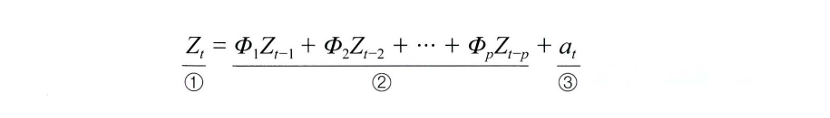

① 시계열 데이터에서 현재 시점을 의미

② 과거가 현재에 미치는 영향을 나타내는 모수에 시계열 데이터의 과거 시점을 곱한 것

③ 시계열 분석에서 오차 항을 의미하며 백색 잡음이라고도 한다.

→ 즉, p 시점을 기준으로 그 이전의 데이터에 의해 현재 시점의 데이터가 영향을 받는 모형이다.

**7.2.2 MA 모델**

MA 모델은 트렌드가 변화하는 상황에 적합한 회귀 모델이다.
  - 시계열을 따라 윈도우 크기만큼 슬라이딩 된다고 하여 이동 평균 모델이라고 함

  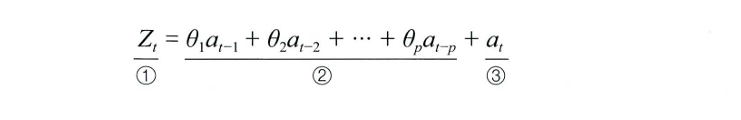

① 시계열 데이터에서 현재 시점을 의미

② 매개변수에 과거 시점의 오차를 곱한 것

③ 오차 항

→ AR 모델처럼 이전 데이터의 상태에서 현재 데이터의 상태를 추론하는 것이 아닌 이전 데이터의 오차에서 현재 데이터의 상태를 추론한겠다는 의미

**7.2.3 ARMA 모델**

ARMA 모델(자동 회귀 이동 평균)은 AR과 MA를 섞은 모델로 두 가지 관점에서 과거의 데이터를 사용하는 것이다.

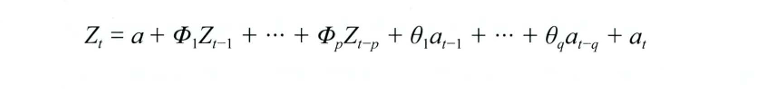



**7.2.4 ARIMA 모델**

ARIMA 모델은 자기 회귀와 이동 평균을 둘 다 고려하는 모형인데 ARMA 모델과 달리 과거 데이터의 선형 관계뿐만 아니라 추세까지 고려한 모델이다.

① ARIMA(p, d, q) 함수 사용
  - p : 자기 회귀 차수
  - d : 차분 차수
  - q : 이동 평균 차수

② fit() 메서드를 호출하고 모델에 데이터를 적용하여 훈련시킴

③ predict() 메서드를 호출하여 미래의 추세 및 동향에 대해 예측

In [ ]:
! conda install -c conda-forge statsmodels

/bin/bash: line 1: conda: command not found


In [ ]:
! pip install statsmodels

In [ ]:
# 1. 저장소 전체를 clone
!git clone https://github.com/gilbutITbook/080289.git

# 2. 작업 디렉토리를 해당 폴더로 이동
%cd 080289/chap07/data/

# 3. 파일 목록 확인
!ls

Cloning into '080289'...
remote: Enumerating objects: 2278, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 2278 (delta 4), reused 27 (delta 3), pack-reused 2246 (from 1)
Receiving objects: 100% (2278/2278), 330.30 MiB | 13.99 MiB/s, done.
Resolving deltas: 100% (13/13), done.
Updating files: 100% (2591/2591), done.
/content/080289/chap07/data
sales.csv  SBUX.csv


<ipython-input-4-bcbb88f1a19b>:11: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = read_csv('/content/080289/chap07/data/sales.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -199.651
Date:                Fri, 30 May 2025   AIC                            411.302
Time:                        05:51:21   BIC                            420.634
Sample:                    01-01-1991   HQIC                           414.523
                         - 12-01-1993                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8788      0.227     -3.876      0.000      -1.323      -0.434
ar.L2         -0.2787      0.232     -1.203      0.229      -0.733       0.176
ar.L3         -0.0076      0.270     -0.028      0.9

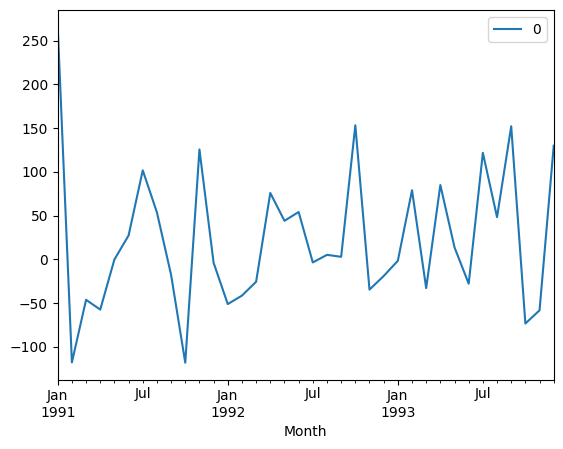

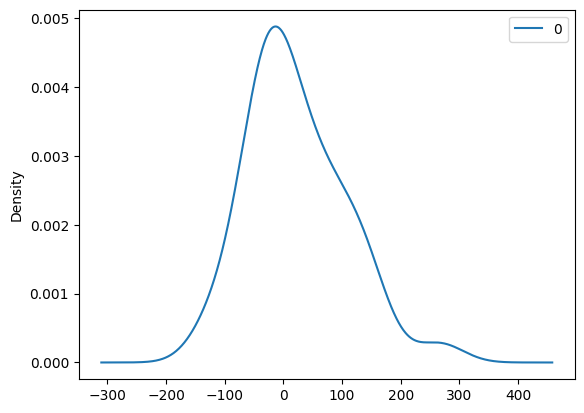

                0
count   36.000000
mean    22.459086
std     82.505331
min   -118.213281
25%    -33.308343
50%      1.361178
75%     76.704967
max    266.000000


In [ ]:
# ARIMA() 함수를 호출하여 sales 데이터셋에 대한 예측
from pandas import read_csv   # 파이썬 판다스 라이브러리의 read_csv() 메서드를 사용해서 외부 TEXT 파일,
from datetime import datetime   # CSV 파일을 불러와서 DataFrame으로 저장
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

def parser(x):   # 시간을 표현하는 함수 정의
    return datetime.strptime('199'+x, '%Y-%m')   # strptime()은 날짜와 시간 정보를 문자열로 바꾸어 주는 메서드

df = read_csv('/content/080289/chap07/data/sales.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)
series = df.iloc[:, 0]  # squeeze 제거 → 첫 번째 열만 Series로 추출  # 자전거 매출에 대한 CSV 데이터 호출
model = ARIMA(series, order=(5, 1, 0))   # ARIMA() 함수 호출
model_fit = model.fit()   # 모형을 적용할 때 많은 디버그 정보가 제공되는데 disp 인수를 0으로 설정하여 이 기능을 비활성화
print(model_fit.summary())      # 모델에 대한 정보 표시
residuals = DataFrame(model_fit.resid)   # DataFrame에 모델에 대한 오차 정보를 residuals라는 변수에 저장
residuals.plot()   # residuals 정보를 시각적으로 표현
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

<ipython-input-5-e1f81babbd40>:12: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = read_csv('/content/080289/chap07/data/sales.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)


predicted=352.85534307, expected=346.30000000
predicted=277.39803580, expected=329.70000000
predicted=368.75373423, expected=445.40000000
predicted=331.77363464, expected=325.90000000
predicted=372.07040727, expected=449.30000000
predicted=360.02087230, expected=411.30000000
predicted=454.52622973, expected=417.40000000
predicted=388.69069931, expected=545.50000000
predicted=437.63244717, expected=477.60000000
predicted=516.43762369, expected=687.00000000
predicted=520.91619059, expected=435.30000000
predicted=675.59464689, expected=587.30000000
predicted=505.20101583, expected=676.90000000
Test MSE: 9118.818


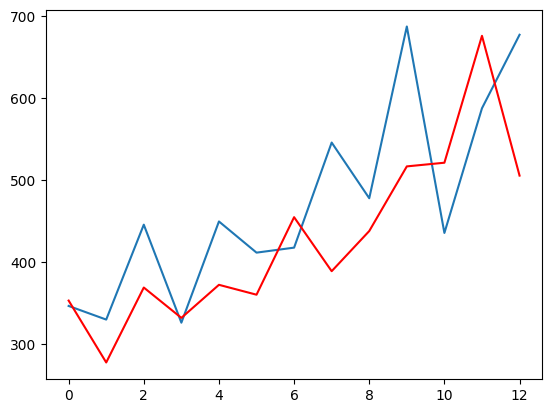

In [ ]:
# statsmodels 라이브러리를 이용한 sales 데이터셋 예측
import numpy as np
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def parser(x):
    return datetime.strptime('199'+x, '%Y-%m')

df = read_csv('/content/080289/chap07/data/sales.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)
series = df.iloc[:, 0]

X = series.values
X = np.nan_to_num(X)
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]   # train과 test로 데이터셋 분리
history = [x for x in train]
predictions = list()

for t in range(len(test)):   # test 데이터셋의 길이(13)만큼 반복하여 수행
    model = ARIMA(history, order=(5, 1, 0))   # ARIMA() 함수 호출
    model_fit = model.fit()
    output = model_fit.forecast(steps=1)   # forecast() 메서드를 사용하여 예측 수행
    yhat = output[0]   # 모델 출력 결과를 yhat에 저장
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%.8f, expected=%.8f' % (yhat, obs))   # 모델 실행 결과를 predicted로 출력하고, test로 분리해 둔 데이터를 expected로 사용하여 출력

error = mean_squared_error(test, predictions)   # 손실 함수로 평균 제곱 오차 사용
print('Test MSE: %.3f' % error)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

# **7.3 순환 신경망(RNN)**

- RNN은 시간적으로 연속성이 있는 데이터를 처리하려고 고안된 인공 신경망이다.
- 새로운 입력이 네트워크로 들어올 때마다 기억은 조금씩 수정되며, 결국 최종적으로 남겨진 기억은 모든 입력 전체를 요약한 정보가 된다.

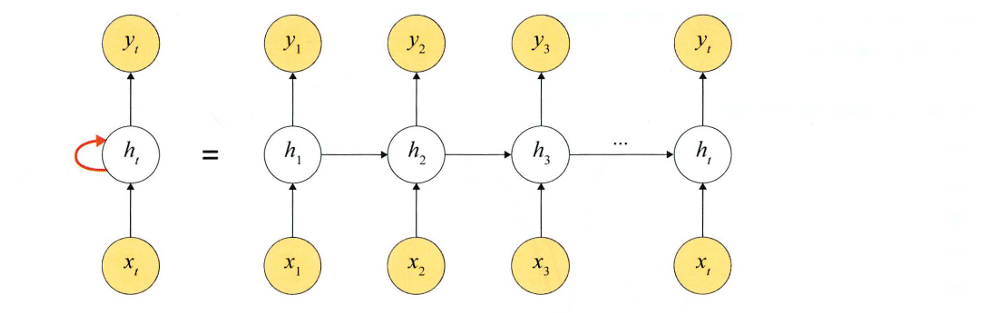

- 입력 길이만큼 이 과정을 얼마든지 반복할 수 있다.
- 즉, 외부 입력과 자신의 이전 상태를 입력받아 현재 상태를 갱신한다.



---
- 일대일 : 순환이 없기 때문에 RNN이라고 말하기 어려움

 ex. 순방향 네트워크
- 일대다 : 입력이 하나이고, 출력이 다수인 구조

 ex. 이미지 캡션
- 다대일 : 입력이 다수이고, 출력이 하나인 구조

 ex. 감성 분석기

```
self.em = nn.Embedding(len(TEXT.vocab.stoi), embeding_dim) # 임베딩 처리
self.rnn = nn.RNNCell(input_dim, hidden_size) # RNN 적용
self.fc1 = nn.Linear(hidden_size, 256) # 완전연결층
self.fc2 = nn.Linear(256, 3) # 출력층
```
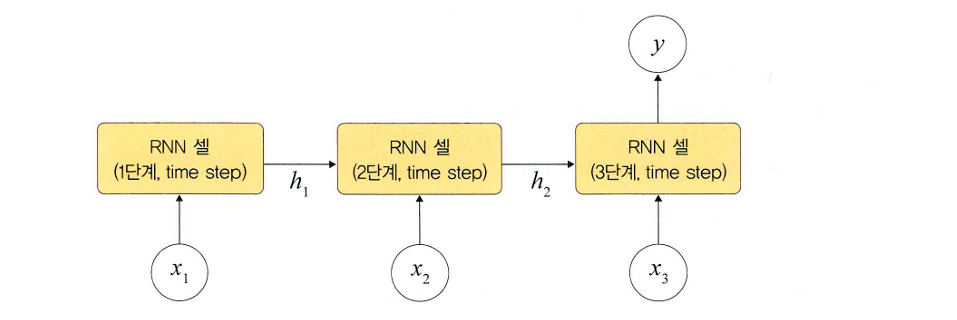

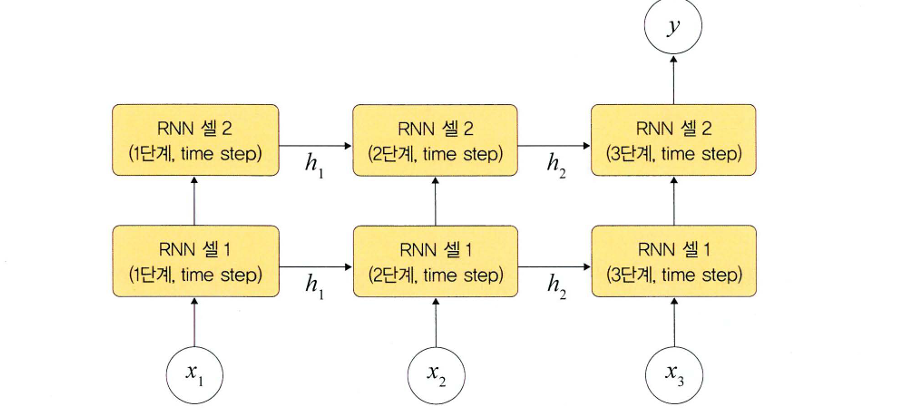


- 다대다 : 입력과 출력이 다수인 구조

 ex. 자동 번역

```
Seq2Seq(
  (encoder): Encoder(
    (embedding): Embedding(7855, 256)
    (rnn): LSTM(256, 512, num_layers=2, dropout=0.5)
    (dropout): Dropout(p=0.5, inplace=False)
  )
  (decoder): Decoder(
    (embedding): Embedding(5893, 256)
    (rnn): LSTM(256, 512, num_layers=2, dropout=0.5)
    (fc_out): Linear(in_features=512, out_features=5893, bias=True)
    (dropout): Dropout(p=0.5, inplace=False)
  )
)
```
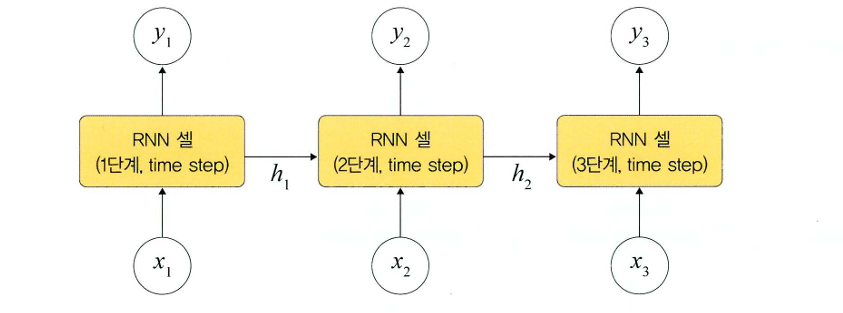

- 동기화 다대다 : 입력과 출력이 다수인 구조

 ex. 언어 모델, 비디오 분류

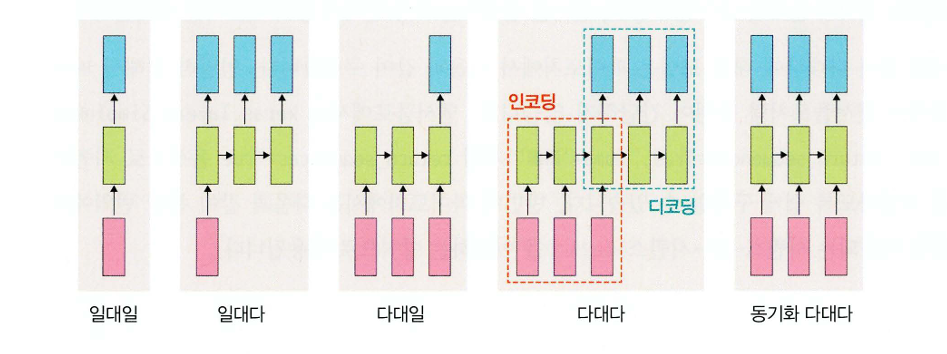


**7.3.1 RNN 계층과 셀**

RNN = RNN layer + RNN cell

- RNN은 내장된 계층뿐만 아니라 셀 레벨의 API도 제공한다
- RNN 계층이 입력된 배치 순서대로 모두 처리하는 것과 다르게 RNN 셀은 오직 하나의 단계만 처리한다

→ RNN 셀은 RNN 계층의 for loop 구문을 갖는 구조이다.

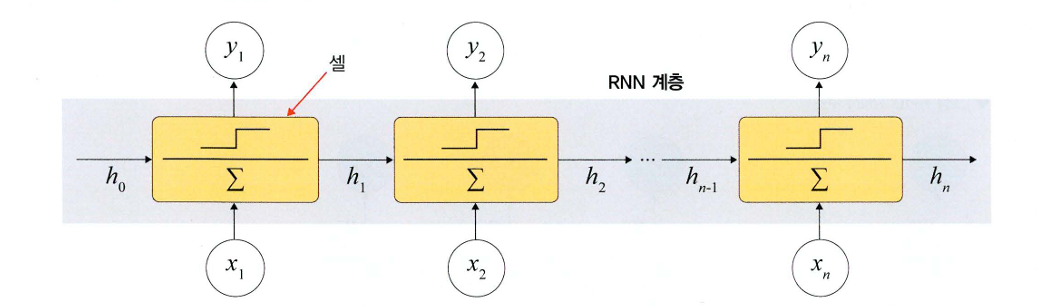

RNN 계층은 셀을 래핑하여 동일한 셀을 여러 단계에 적용한다.

셀의 유형
  - nn.RNNCell : SimpleRNN 계층에 대응되는 셀
  - nn.GRUCell : GRU 계층에 대응되는 GPU 셀
  - nn.LSTMCell : LSTM 계층에 대응되는 LSTM 셀

- 대표적인 RNN의 활용 분야는 자연어 처리이다.
  - 연속적인 단어들의 나열인 언어 처리는 음성 인식, 단어의 의미 판단 및 대화 등에 대한 처리가 가능하다



---



---



# **문자 단위 RNN 실습 코드**

- RNN의 입출력의 단위가 단어 레벨이 아니라 문자 레벨로 하여 RNN을 구현한다면 이를 문자 단위 RNN라고 한다.

# 1. 문자 단위 RNN(Char RNN)

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

**1) 훈련 데이터 전처리하기**

In [7]:
input_str = 'apple'
label_str = 'pple!'
char_vocab = sorted(list(set(input_str+label_str)))
vocab_size = len(char_vocab)
print ('문자 집합의 크기 : {}'.format(vocab_size))

문자 집합의 크기 : 5


In [8]:
input_size = vocab_size   # 입력의 크기는 문자 집합의 크기
hidden_size = 5
output_size = 5
learning_rate = 0.1

In [9]:
char_to_index = dict((c, i) for i, c in enumerate(char_vocab)) # 문자에 고유한 정수 인덱스 부여
print(char_to_index)

{'!': 0, 'a': 1, 'e': 2, 'l': 3, 'p': 4}


In [10]:
# 예측 결과를 다시 문자로 보기 위해 정수 → 문자
index_to_char={}
for key, value in char_to_index.items():
    index_to_char[value] = key
print(index_to_char)

{0: '!', 1: 'a', 2: 'e', 3: 'l', 4: 'p'}


In [11]:
# 입력 데이터와 레이블 데이터 각 문자들을 정수로 맵핑
x_data = [char_to_index[c] for c in input_str]
y_data = [char_to_index[c] for c in label_str]
print(x_data)
print(y_data)

[1, 4, 4, 3, 2]
[4, 4, 3, 2, 0]


In [12]:
# 배치 차원 추가
# 텐서 연산인 unsqueeze(0)를 통해 해결할 수도 있었음.
x_data = [x_data]
y_data = [y_data]
print(x_data)
print(y_data)

[[1, 4, 4, 3, 2]]
[[4, 4, 3, 2, 0]]


In [13]:
# 입력 시퀀스를 원-핫 벡터로 변경
x_one_hot = [np.eye(vocab_size)[x] for x in x_data]
print(x_one_hot)

[array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]])]


In [14]:
# 입력 데이터 레이블 데이터를 텐서로 변환
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

<ipython-input-14-0d017e108e54>:2: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  X = torch.FloatTensor(x_one_hot)


In [15]:
print('훈련 데이터의 크기 : {}'.format(X.shape))
print('레이블의 크기 : {}'.format(Y.shape))

훈련 데이터의 크기 : torch.Size([1, 5, 5])
레이블의 크기 : torch.Size([1, 5])


**2) 모델 구현하기**

In [16]:
# fc는 완전 연결층을 의미하며 출력층으로 사용
class Net(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.rnn = torch.nn.RNN(input_size, hidden_size, batch_first=True) # RNN 셀 구현
        self.fc = torch.nn.Linear(hidden_size, output_size, bias=True) # 출력층 구현

    def forward(self, x): # 구현한 RNN 셀과 출력층을 연결
        x, _status = self.rnn(x)
        x = self.fc(x)
        return x

In [17]:
# 모델을 net에 저장
net = Net(input_size, hidden_size, output_size)

In [18]:
outputs = net(X)
print(outputs.shape) # 3차원 텐서

torch.Size([1, 5, 5])


In [19]:
print(outputs.view(-1, input_size).shape) # 2차원 텐서로 변환

torch.Size([5, 5])


In [20]:
print(Y.shape)
print(Y.view(-1).shape)

torch.Size([1, 5])
torch.Size([5])


In [21]:
# 옵티마이저와 손실 함수 정의
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), learning_rate)

In [22]:
# 100번의 에포크 학습
for i in range(100):
    optimizer.zero_grad()
    outputs = net(X)
    loss = criterion(outputs.view(-1, input_size), Y.view(-1)) # view를 하는 이유는 Batch 차원 제거를 위해
    loss.backward() # 기울기 계산
    optimizer.step() # 아까 optimizer 선언 시 넣어둔 파라미터 업데이트

    # 아래 세 줄은 모델이 실제 어떻게 예측했는지를 확인하기 위한 코드.
    result = outputs.data.numpy().argmax(axis=2) # 최종 예측값인 각 time-step 별 5차원 벡터에 대해서 가장 높은 값의 인덱스를 선택
    result_str = ''.join([index_to_char[c] for c in np.squeeze(result)])
    print(i, "loss: ", loss.item(), "prediction: ", result, "true Y: ", y_data, "prediction str: ", result_str)


0 loss:  1.7228120565414429 prediction:  [[0 3 0 0 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  !l!!!
1 loss:  1.4264869689941406 prediction:  [[2 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  eple!
2 loss:  1.2400028705596924 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
3 loss:  1.0581480264663696 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
4 loss:  0.8735365867614746 prediction:  [[4 4 3 2 4]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pplep
5 loss:  0.7017837762832642 prediction:  [[4 4 3 2 4]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pplep
6 loss:  0.5383351445198059 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
7 loss:  0.3854864239692688 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
8 loss:  0.26189228892326355 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
9 loss:  0.1736903041601181 prediction:  [[4 4 3 2 0]]

# 2. 더 많은 데이터로 학습한 문자 단위 RNN (Char RNN)

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim

**1) 훈련 데이터 전처리하기**

In [24]:
sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")

In [25]:
char_set = list(set(sentence)) # 중복을 제거한 문자 집합 생성
char_dic = {c: i for i, c in enumerate(char_set)} # 각 문자에 정수 인코딩

In [26]:
print(char_dic) # 공백도 여기서는 하나의 원소

{'l': 0, 'c': 1, 'k': 2, 'b': 3, "'": 4, 't': 5, '.': 6, ' ': 7, 'u': 8, 'w': 9, 'i': 10, 'e': 11, 's': 12, 'f': 13, 'h': 14, 'p': 15, 'g': 16, ',': 17, 'r': 18, 'n': 19, 'a': 20, 'm': 21, 'y': 22, 'd': 23, 'o': 24}


In [27]:
dic_size = len(char_dic)
print('문자 집합의 크기 : {}'.format(dic_size))

문자 집합의 크기 : 25


In [28]:
# 하이퍼파라미터 설정
hidden_size = dic_size
sequence_length = 10  # 임의 숫자 지정
learning_rate = 0.1

In [29]:
# 데이터 구성
x_data = []
y_data = []

for i in range(0, len(sentence) - sequence_length):
    x_str = sentence[i:i + sequence_length]
    y_str = sentence[i + 1: i + sequence_length + 1]
    print(i, x_str, '->', y_str)

    x_data.append([char_dic[c] for c in x_str])  # x str to index
    y_data.append([char_dic[c] for c in y_str])  # y str to index

0 if you wan -> f you want
1 f you want ->  you want 
2  you want  -> you want t
3 you want t -> ou want to
4 ou want to -> u want to 
5 u want to  ->  want to b
6  want to b -> want to bu
7 want to bu -> ant to bui
8 ant to bui -> nt to buil
9 nt to buil -> t to build
10 t to build ->  to build 
11  to build  -> to build a
12 to build a -> o build a 
13 o build a  ->  build a s
14  build a s -> build a sh
15 build a sh -> uild a shi
16 uild a shi -> ild a ship
17 ild a ship -> ld a ship,
18 ld a ship, -> d a ship, 
19 d a ship,  ->  a ship, d
20  a ship, d -> a ship, do
21 a ship, do ->  ship, don
22  ship, don -> ship, don'
23 ship, don' -> hip, don't
24 hip, don't -> ip, don't 
25 ip, don't  -> p, don't d
26 p, don't d -> , don't dr
27 , don't dr ->  don't dru
28  don't dru -> don't drum
29 don't drum -> on't drum 
30 on't drum  -> n't drum u
31 n't drum u -> 't drum up
32 't drum up -> t drum up 
33 t drum up  ->  drum up p
34  drum up p -> drum up pe
35 drum up pe -> rum up peo
36

In [30]:
print(x_data[0])
print(y_data[0])

[10, 13, 7, 22, 24, 8, 7, 9, 20, 19]
[13, 7, 22, 24, 8, 7, 9, 20, 19, 5]


In [31]:
x_one_hot = [np.eye(dic_size)[x] for x in x_data] # x 데이터는 원-핫 인코딩
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

In [32]:
print('훈련 데이터의 크기 : {}'.format(X.shape))
print('레이블의 크기 : {}'.format(Y.shape))

훈련 데이터의 크기 : torch.Size([170, 10, 25])
레이블의 크기 : torch.Size([170, 10])


In [33]:
print(X[0])

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [34]:
# 레이블 데이터 첫번째 샘플 출력
print(Y[0])

tensor([13,  7, 22, 24,  8,  7,  9, 20, 19,  5])


**2) 모델 구현하기**

In [35]:
class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, layers): # 현재 hidden_size는 dic_size와 같음.
        super(Net, self).__init__()
        self.rnn = torch.nn.RNN(input_dim, hidden_dim, num_layers=layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, hidden_dim, bias=True)

    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x)
        return x

In [36]:
net = Net(dic_size, hidden_size, 2) # 이번에는 층을 두 개 쌓습니다.

In [37]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), learning_rate)

In [38]:
outputs = net(X)
print(outputs.shape) # 3차원 텐서

torch.Size([170, 10, 25])


In [39]:
print(outputs.view(-1, dic_size).shape) # 2차원 텐서로 변환.

torch.Size([1700, 25])


In [40]:
print(Y.shape)
print(Y.view(-1).shape)

torch.Size([170, 10])
torch.Size([1700])


In [41]:
for i in range(100):
    optimizer.zero_grad()
    outputs = net(X) # (170, 10, 25) 크기를 가진 텐서를 매 에포크마다 모델의 입력으로 사용
    loss = criterion(outputs.view(-1, dic_size), Y.view(-1))
    loss.backward()
    optimizer.step()

    # results의 텐서 크기는 (170, 10)
    results = outputs.argmax(dim=2)
    predict_str = ""
    for j, result in enumerate(results):
        if j == 0: # 처음에는 예측 결과를 전부 가져오지만
            predict_str += ''.join([char_set[t] for t in result])
        else: # 그 다음에는 마지막 글자만 반복 추가
            predict_str += char_set[result[-1]]

    print(predict_str)

                                                                                                                                                                                   
                                                                                                                                                                                   
g.att,. t,..gg,,,,,,,,,gg..g,,.g,..,,,,,,g,,gg..g,..gg,.g,.,gg,,gg.,g,,g,,,gg,.kgg..,,.,,,,,,,g,.,g..gg,.g,.,g..g,..,,g,,,g,,g,.,gg,,g,gg..,g,.kg,.,gg,.gg,kg,,tg,.g,,,,..,g,.,,.gg
ththd thttmthtmtmshtshdht thahdtthahd ttttthtttdtthd tht dthtshrshtththd sttdmahd thahd thdhhtsttttmtmthd thd thththththt tthtsttshe thttttmshthd the dhd thdhthdhmttthttdtshe thd 
toe   eoetetooot t  tteoeotoeot t e t tototot tt ttt t t t trttrtet ttoto t t tot t t t totote ttt  o tototot t t t totoe ett  tetot tot  trt t t toe eot t t toeyaoot t t totmtot 
to     o   u                                      or   u   o          or            u               